In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from dataset_custom import *
from ae import *
import numpy as np

batch_size = 1000
sequence_length = 5
out_window = sequence_length

cols = ['RW1_motcurr']

target = None

if target != None:
    no_features = len(cols) - len(target)
else:
    no_features = len(cols)
    target = cols

train_iter = torch.load('../dataloader/train_dataloader.pth')
test_iter = torch.load('../dataloader/test_dataloader.pth')

model = torch.load('../models/vae.pth').to('cuda')

predict = False

In [36]:
x, y = next(iter(test_iter))

x, mu, sigma, mu, sigma, yo = model(x.to('cuda'))

feat = 0

if predict:
    plt.plot(y[0,:,feat].to("cpu").detach().numpy())
else:
    plt.plot(x[0,:,feat].to("cpu").detach().numpy())

ValueError: not enough values to unpack (expected 6, got 3)

In [33]:
yo[2].flatten(0,1).shape

torch.Size([5000, 4])

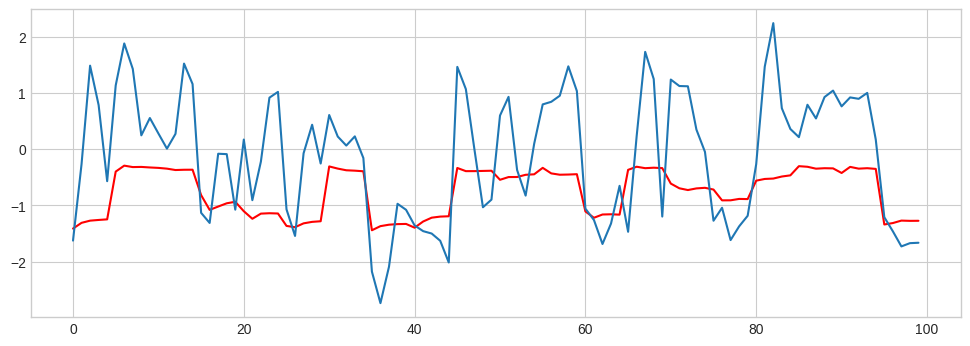

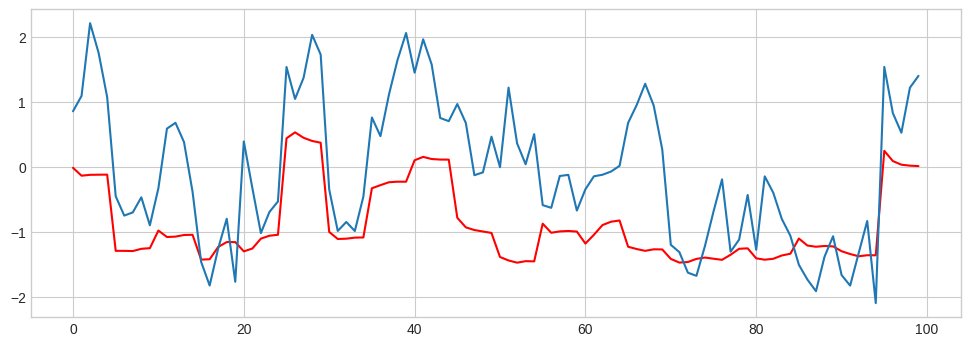

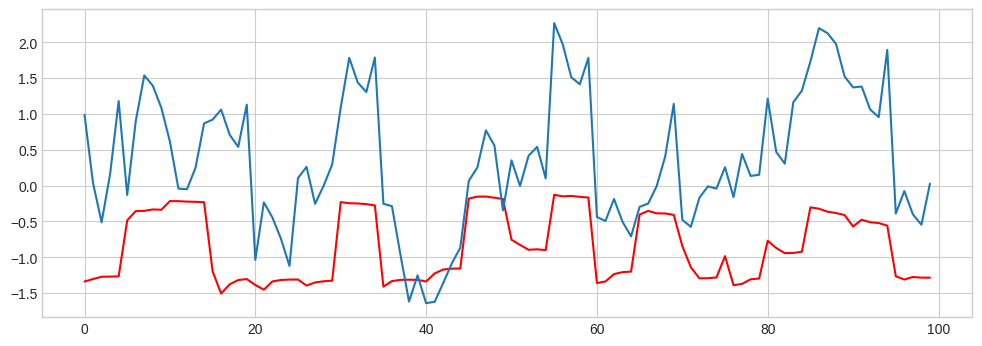

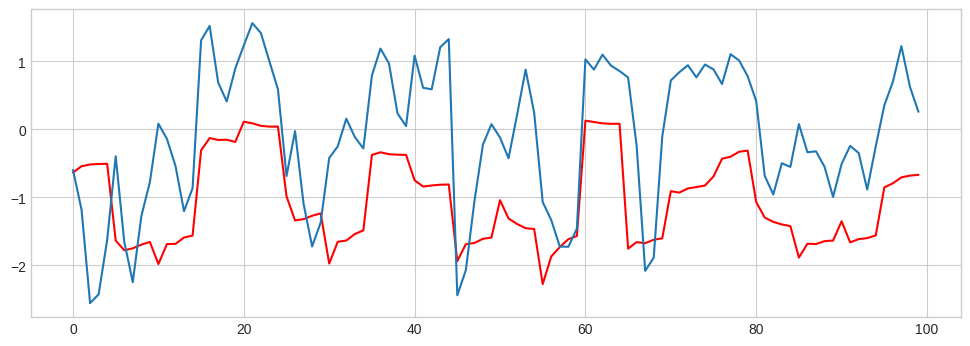

In [34]:
for i in range(x.shape[2]):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(12,4))
    #x = np.linspace(0, sequence_length)
    plt.plot(yo[0].flatten(0,1)[:100, i].to("cpu").detach().numpy(), 'r')
    plt.plot(x.flatten(0,1)[:100,i].to("cpu").detach().numpy())

In [4]:
plot_th = 10

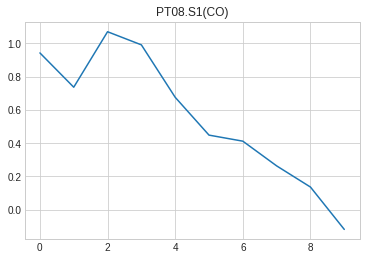

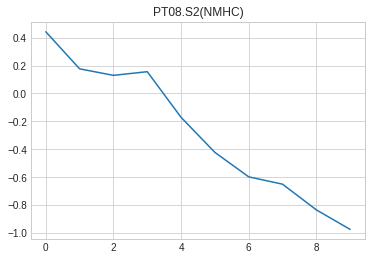

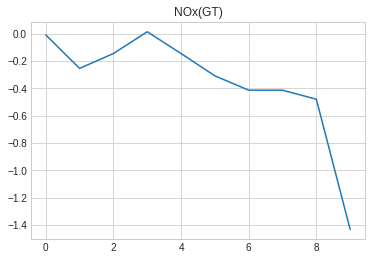

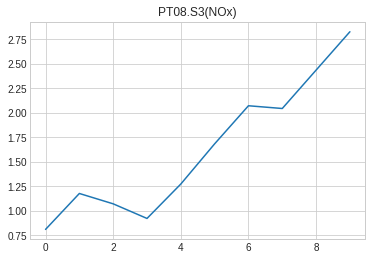

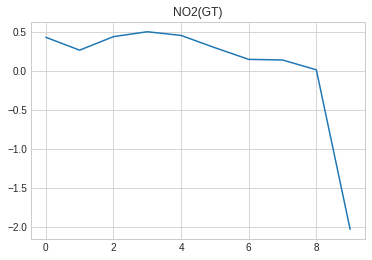

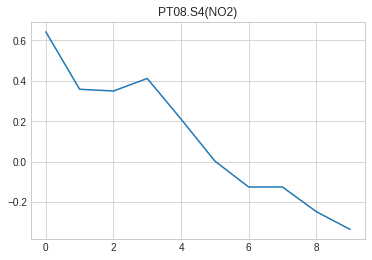

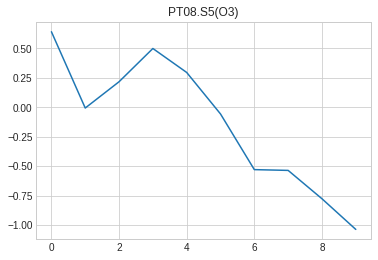

In [5]:
df = dataRaw.copy()

x = df.values #returns a numpy array
#scaler= MinMaxScaler()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
dfNorm = pd.DataFrame(x_scaled, columns=df.columns)

for col in dfNorm.columns:
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure()
    ax = plt.axes()
    plt.title(col)

    x = np.linspace(0, dfNorm.shape[0])
    ax.plot(dfNorm[col][:plot_th])
    #ax.plot(labels['label'] / 10)


#os.environ["CUDA_VISIBLE_DEVICES"]="0"   # comment this line if you want to use all of your GPUs
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

In [6]:
predict = False

In [7]:
batch_size = 32
sequence_length = 10
out_window = 10

target = None

if target != None:
    no_features = len(cols) - len(target)
else:
    no_features = len(cols)
    target = cols

In [8]:
train_iter = torch.load('./dataloader/train_dataloader.pth')
test_iter = torch.load('./dataloader/test_dataloader.pth')

In [17]:
model = torch.load('./models/vae.pth').to('cuda')

In [18]:
x, y = next(iter(test_iter))

In [19]:
x, mu, sigma, mu, sigma, yo = model(x.to('cuda'))

In [20]:
feat = 0

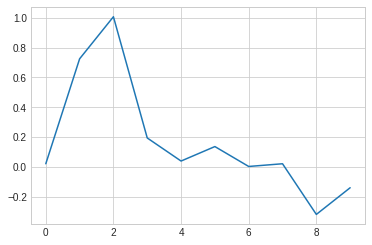

In [21]:
if predict:
    plt.plot(y[0,:,feat].to("cpu").detach().numpy())
else:
    plt.plot(x[0,:,feat].to("cpu").detach().numpy())

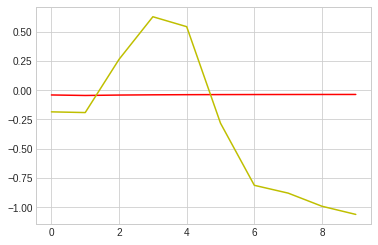

In [22]:
plt.plot(yo[1,:,feat].to("cpu").detach().numpy(), 'r')
plt.plot(y[1,:,feat].to("cpu").detach().numpy(), 'y')
#plt.plot(x[0,:,0].to("cpu").detach().numpy(), 'b')
#plt.plot(x[0,:,1].to("cpu").detach().numpy(), 'g')

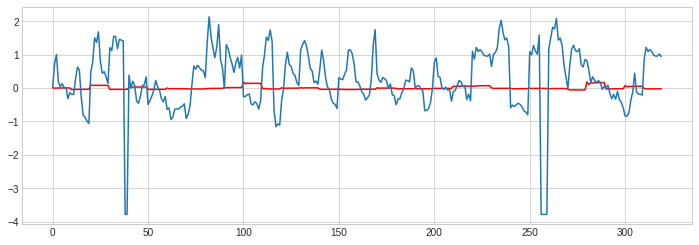

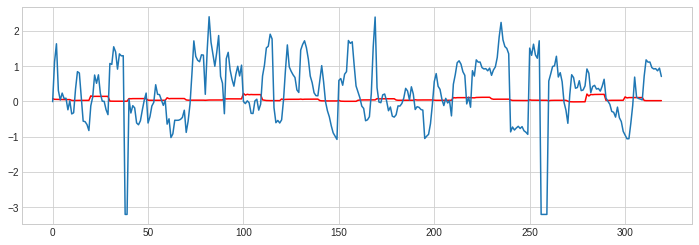

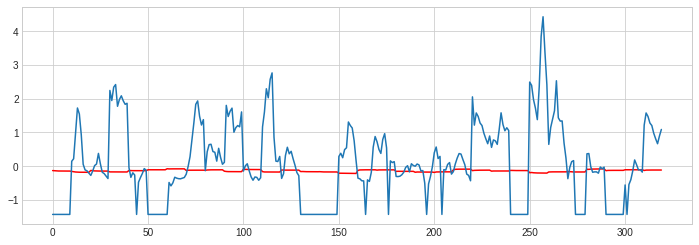

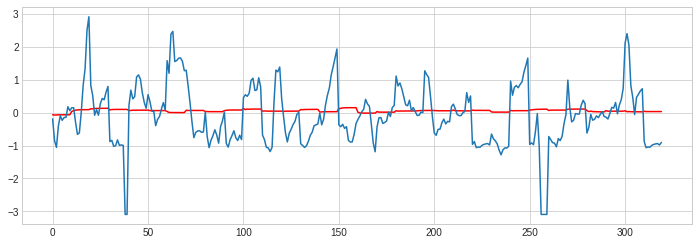

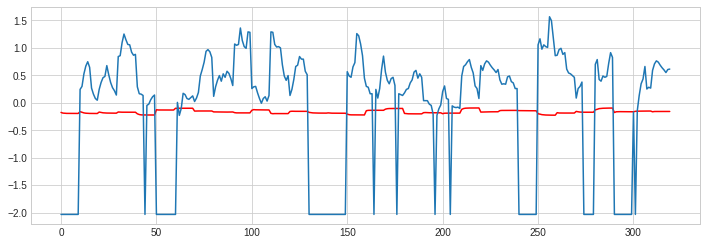

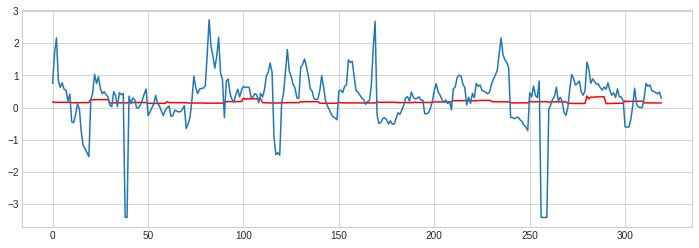

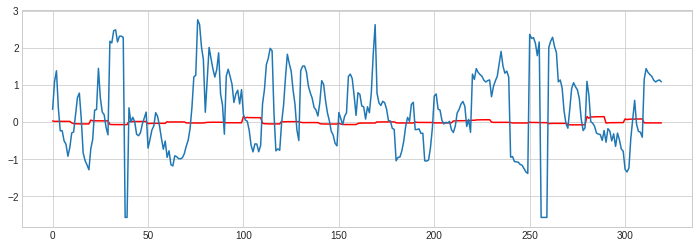

In [23]:
for i in range(x.shape[2]):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(12,4))
    #x = np.linspace(0, sequence_length)
    plt.plot(yo.flatten(0,1)[:,i].to("cpu").detach().numpy(), 'r')
    plt.plot(x.flatten(0,1)[:,i].to("cpu").detach().numpy())

#Inject anomaly

In [17]:
import random

In [18]:
x, y = next(iter(test_iter))

In [32]:
batch = 10
x_a = x.clone()
change_value = [1,2]
injected = []
for i in range(x.shape[2]):
    print(i)
    if i in change_value:
        print('changing')
        inject = list(x_a[batch ,:, i].cpu().numpy())
        inject_anomaly = [t + 10*np.std(inject)*random.uniform(0.8,1) for t in inject]
        #x_a[batch,:, i] =  torch.Tensor(fake)
        x_a[batch,:, i] = torch.Tensor(inject_anomaly)
        
        injected.append(i)
    
    if all(x_a[batch,:,i]==x[batch,:,i]):
        print('original tensor and anomalous are the same on features',i)

0
original tensor and anomalous are the same on features 0
1
changing
2
changing
3
original tensor and anomalous are the same on features 3
4
original tensor and anomalous are the same on features 4
5
original tensor and anomalous are the same on features 5
6
original tensor and anomalous are the same on features 6


In [33]:
idx = batch*sequence_length

In [34]:
model = torch.load('./models/vae_v2.pth')

In [51]:
x_a, mu, sigma, yo_a = model(x_a.to('cuda'))

In [52]:
x, mu, sigma, yo = model(x.to('cuda'))

In [53]:
len(x_a.flatten(0,1)[idx - 20: idx + 20,i].to("cpu").detach().numpy())

40

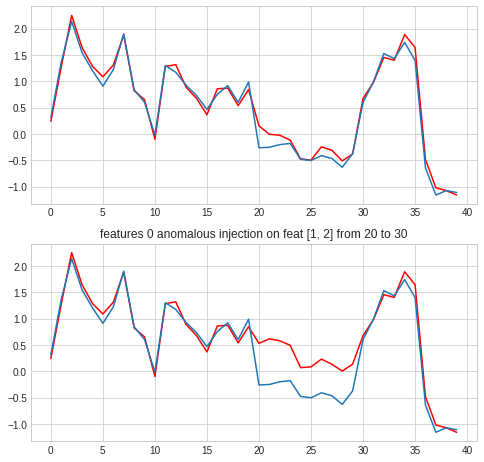

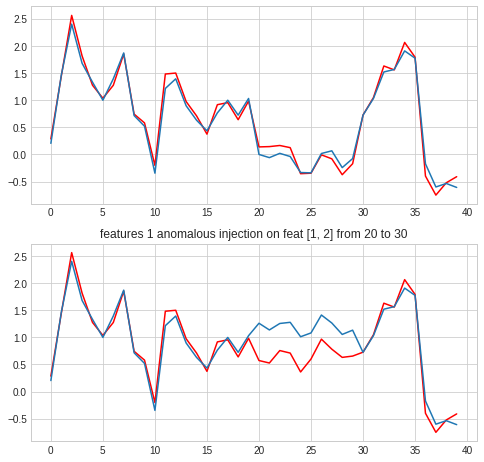

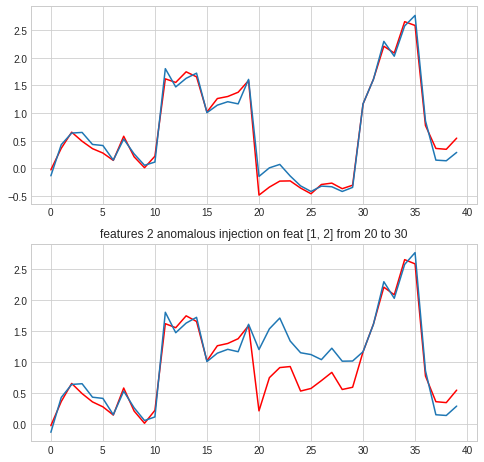

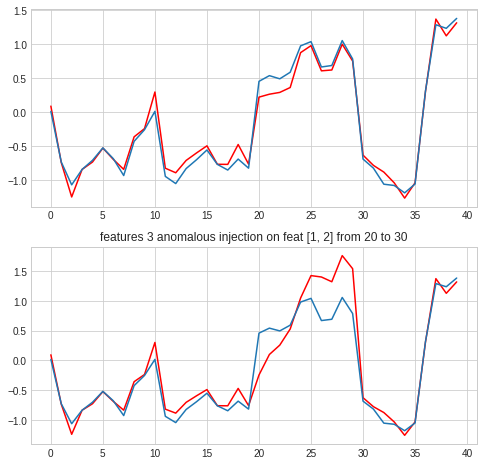

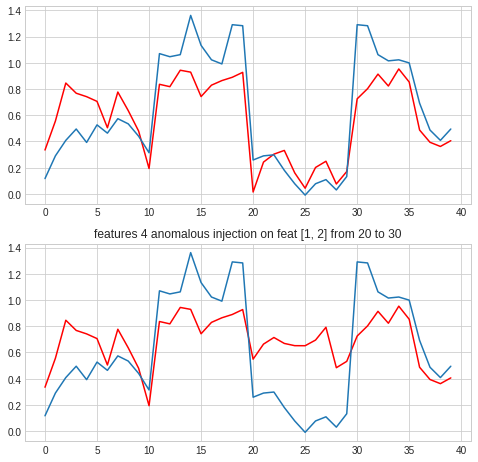

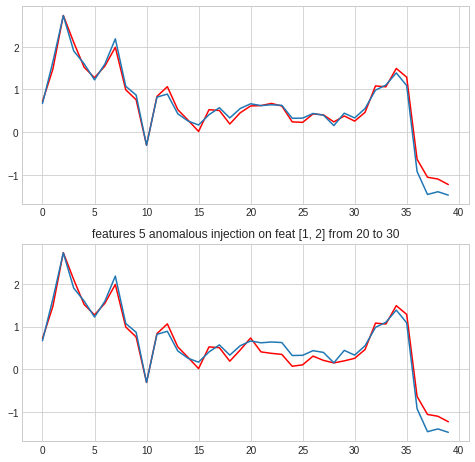

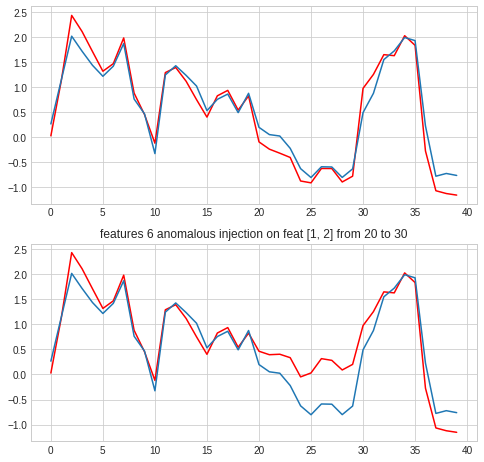

In [54]:
for i in range(x.shape[2]):
    plt.style.use('seaborn-whitegrid')
    fig, axs = plt.subplots(2, figsize=(8,8))
    #x = np.linspace(0, sequence_length)
    axs[0].plot(yo.flatten(0,1)[idx - 20: idx + 20,i].to("cpu").detach().numpy(), 'r')
    axs[0].plot(x.flatten(0,1)[idx - 20: idx + 20,i].to("cpu").detach().numpy())
    plt.title('no anomalies')
    axs[1].plot(yo_a.flatten(0,1)[idx - 20: idx + 20,i].to("cpu").detach().numpy(), 'r')
    axs[1].plot(x_a.flatten(0,1)[idx - 20: idx + 20,i].to("cpu").detach().numpy())

    an_idx = len(x_a.flatten(0,1)[idx - 20: idx + 20,i].to("cpu").detach().numpy())//2

    plt.title('features {} anomalous injection on feat {} from {} to {}'.format(i ,injected, int(an_idx), int(an_idx)+ batch))

In [22]:
model

LSTM_VAE(
  (encoder): Encoder_vae(
    (act2): InverseSquareRootLinearUnit()
    (LSTM1): LSTM(7, 128, batch_first=True)
    (LSTM2): LSTM(128, 64, batch_first=True)
    (mu): Linear(in_features=64, out_features=5, bias=True)
    (sigma): Linear(in_features=64, out_features=5, bias=True)
  )
  (decoder): Decoder_vae(
    (act2): InverseSquareRootLinearUnit()
    (act3): ClippedTanh()
    (LSTMdec): LSTM(5, 64, batch_first=True)
    (LSTM1): LSTM(64, 128, batch_first=True)
    (fc): Linear(in_features=128, out_features=7, bias=True)
  )
)